<a href="https://colab.research.google.com/github/helloyaz/weatherwise_Yasmine_Kyaw_19473235/blob/main/weatherwise_Yasmine_Kyaw_19473235_starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.



## 📦 Setup and Configuration
Required packages and set-up components are installed/imported here.

In [8]:
import os
import requests
import json
import matplotlib.pyplot as plt
import ipywidgets as widgets

!pip pyinputplus as pyip
!pip install fetch-my-weather hands-on-ai pyinputplus

from datetime import datetime
from IPython.display import display, clear_output, HTML
from fetch_my_weather import get_weather
from hands_on_ai.chat import get_response


ERROR: unknown command "pyinputplus"


## 🌤️ Weather Data Functions

In [9]:
# Always use `weather_data` as the main variable to hold results from get_weather_data()
import requests  # Ensure this is imported in your notebook

def get_weather_data(city="Perth", forecast_days=3):
    if forecast_days > 3:
        print("⚠️ Sorry! Only up to 3 days of forecast can be provided.")
        forecast_days = 3

    try:
        url = f"https://wttr.in/{city}?format=j1"
        response = requests.get(url)
        response.raise_for_status()  # Raise error if response code is not 200
        data = response.json()

        # Extract current weather info
        current = data.get("current_condition", [{}])[0]
        weather_now = {
            "temp_C": current.get("temp_C", "N/A"),
            "condition": current.get("weatherDesc", [{}])[0].get("value", "Unknown")
        }

        print(f"\n📍 Weather for {city}")
        print(f"🌡️ Current Temperature: {weather_now['temp_C']}°C")
        print(f"⛅ Condition: {weather_now['condition']}")

        # Extract forecast
        forecast_data = []
        weather_days = data.get("weather", [])[:forecast_days]

        if weather_days:
            print("\n📅 Temperature Forecast:")
            for day in weather_days:
                condition = day.get("hourly", [{}])[4].get("weatherDesc", [{}])[0].get("value", "Unknown")
                readable_condition = convert_condition_to_message(condition)

                forecast = {
                    "date": day.get("date", "Unknown"),
                    "min_temp_C": day.get("mintempC", "N/A"),
                    "max_temp_C": day.get("maxtempC", "N/A"),
                    "condition": condition
                }
                forecast_data.append(forecast)

                print(f"  • {forecast['date']}: {forecast['min_temp_C']}°C – {forecast['max_temp_C']}°C, {readable_condition}")
        else:
            print("⚠️ No forecast data available.")

        return {
            "city": city,
            "current": weather_now,
            "forecast": forecast_data
        }

    except requests.exceptions.RequestException as req_err:
        print(f"\n❌ Network or request error: {req_err}")
        return {"error": str(req_err)}

    except ValueError as val_err:
        print(f"\n❌ Data processing error: {val_err}")
        return {"error": str(val_err)}

    except Exception as e:
        print(f"\n❌ Unexpected error: {e}")
        return {"error": str(e)}


def convert_condition_to_message(condition):
    """Converts a raw weather condition into a descriptive message."""
    condition = condition.lower()
    if "rain" in condition:
        return f"{condition} 🌧️ – Rain expected"
    elif "cloud" in condition:
        return f"{condition} ☁️ – Cloudy skies"
    elif "sun" in condition or "clear" in condition:
        return f"{condition} ☀️ – Clear weather"
    elif "thunder" in condition:
        return f"{condition} ⚡ – Thunderstorms possible"



In [10]:
# Get weather data for a chosen city and number of forecast days (max 3)
weather_data = get_weather_data("Perth", 3)



📍 Weather for Perth
🌡️ Current Temperature: 23°C
⛅ Condition: Sunny

📅 Temperature Forecast:
  • 2025-05-28: 14°C – 23°C, sunny ☀️ – Clear weather
  • 2025-05-29: 16°C – 21°C, partly cloudy  ☁️ – Cloudy skies
  • 2025-05-30: 18°C – 22°C, patchy rain nearby 🌧️ – Rain expected


## 📊 Visualisation Functions

In [12]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

def create_temperature_visualisation(weather_data, output_type='display'):
    """
    Visualize the temperature forecast using a bar chart.

    Args:
        weather_data (dict): Processed weather data containing forecast.
        output_type (str): 'display' to show plot in notebook or 'figure' to return the figure.

    Returns:
        matplotlib.figure.Figure: The figure object if output_type is 'figure'; otherwise, displays the chart.
    """
    try:
        forecast = weather_data.get("forecast", [])
        if not forecast:
            print("⚠️ No forecast data available to visualize.")
            return

        dates = [day.get("date", "Unknown") for day in forecast]
        min_temps = [int(day.get("min_temp_C", 0)) for day in forecast]
        max_temps = [int(day.get("max_temp_C", 0)) for day in forecast]

        fig, ax = plt.subplots(figsize=(8, 5))
        ax.bar(dates, min_temps, label='Min Temp (°C)', color='skyblue')
        ax.bar(dates, max_temps, label='Max Temp (°C)', color='orange', alpha=0.7)

        ax.set_title(f"Temperature Forecast for {weather_data.get('city', 'Unknown')}")
        ax.set_xlabel("Date")
        ax.set_ylabel("Temperature (°C)")
        ax.legend()
        ax.grid(True)

        if output_type == 'figure':
            return fig
        else:
            plt.tight_layout()
            plt.show()

    except Exception as e:
        print(f"❌ Error in temperature visualization: {e}")



In [26]:
import matplotlib.pyplot as plt
import numpy as np

def create_temperature_visualisation(weather_data, output_type='display'):
    """
    Create a grouped bar chart showing min and max temperature forecast.

    Args:
        weather_data (dict): The processed weather data. Must contain a 'forecast' list of daily entries with 'date',
                             'min_temp_C', and 'max_temp_C'. Optionally may include 'city' name.
        output_type (str): 'display' to show the chart immediately in notebook, or 'figure' to return the figure object.

    Returns:
        If output_type is 'figure', returns a matplotlib Figure object.
        Otherwise, displays the figure in the notebook.
    """

    # Retrieve forecast list; fail gracefully if missing
    forecast = weather_data.get("forecast", [])
    if not forecast:
        print("⚠️ No forecast data available to visualize.")
        return

    # Use provided city name for chart title, fallback if unavailable
    city = weather_data.get("city", "Unknown Location")

    # Extract forecasted dates and temperatures
    dates = [day['date'] for day in forecast]
    min_temps = [int(day['min_temp_C']) for day in forecast]
    max_temps = [int(day['max_temp_C']) for day in forecast]

    # Set positions for grouped bars
    x = np.arange(len(dates))        # Numeric positions on x-axis
    width = 0.35                     # Width of each bar

    # Create the figure and axes for the plot
    fig, ax = plt.subplots(figsize=(8, 5))

    # Plot side-by-side bars for min and max temps
    ax.bar(x - width/2, min_temps, width, label='Min Temp (°C)', color='skyblue')
    ax.bar(x + width/2, max_temps, width, label='Max Temp (°C)', color='salmon')

    # Add title and axis labels
    ax.set_title(f"Temperature Forecast for {city}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Temperature (°C)")

    # Set x-axis tick positions and rotate for readability
    ax.set_xticks(x)
    ax.set_xticklabels(dates, rotation=45)

    # Add legend and grid
    ax.legend()
    ax.grid(True, axis='y')          # Horizontal grid lines only

    # Optimize layout to prevent clipping
    plt.tight_layout()

    # Display or return the plot
    if output_type == 'figure':
        return fig
    else:
        plt.show()



📍 Weather for Adelaide
🌡️ Current Temperature: 15°C
⛅ Condition: Partly cloudy

📅 Temperature Forecast:
  • 2025-05-28: 10°C – 16°C, partly cloudy  ☁️ – Cloudy skies
  • 2025-05-29: 12°C – 17°C, sunny ☀️ – Clear weather
  • 2025-05-30: 10°C – 17°C, sunny ☀️ – Clear weather


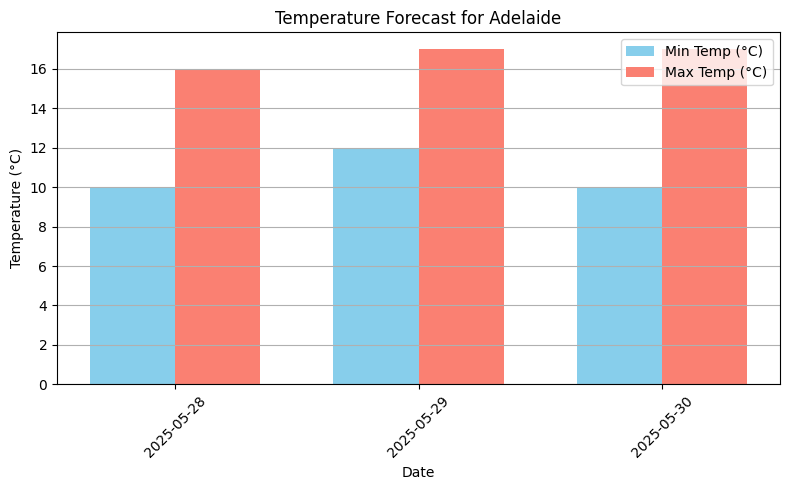

In [27]:
# ✅ Use this consistently throughout your notebook
weather_data = get_weather_data("Adelaide", 3)


# Visualize temperature forecast
create_temperature_visualisation(weather_data)


In [28]:
import matplotlib.pyplot as plt

def create_precipitation_summary_chart(weather_data):
    """
    Create a horizontal summary chart of precipitation expectations based on textual weather conditions.

    Args:
        weather_data (dict): Processed weather data containing forecast.

    Returns:
        None. Displays a horizontal bar chart.
    """
    try:
        forecast = weather_data.get("forecast", [])
        if not forecast:
            print("⚠️ Forecast data is missing or invalid.")
            return

        dates = [day.get("date", "Unknown") for day in forecast]
        descriptions = [day.get("condition", "Unknown").lower() for day in forecast]

        category = []
        color_map = {
            "rain": "#3498db",
            "cloud": "#95a5a6",
            "clear": "#f1c40f",
            "snow": "#a29bfe",
            "other": "#dfe6e9"
        }
        bar_colors = []

        for cond in descriptions:
            if any(w in cond for w in ["rain", "shower", "drizzle", "thunderstorm"]):
                category.append("Rain")
                bar_colors.append(color_map["rain"])
            elif "snow" in cond:
                category.append("Snow")
                bar_colors.append(color_map["snow"])
            elif "cloud" in cond or "overcast" in cond:
                category.append("Cloudy")
                bar_colors.append(color_map["cloud"])
            elif "sun" in cond or "clear" in cond:
                category.append("Clear")
                bar_colors.append(color_map["clear"])
            else:
                category.append("Other")
                bar_colors.append(color_map["other"])

        fig, ax = plt.subplots(figsize=(8, 4))
        ax.barh(dates, [1] * len(category), color=bar_colors)

        for i, cat in enumerate(category):
            ax.text(0.5, i, cat, va='center', ha='center', color='black', fontweight='bold')

        ax.set_title("Precipitation Forecast Summary")
        ax.set_xlabel("Weather Category (Not to Scale)")
        ax.set_xlim(0, 1)
        ax.set_yticks(range(len(dates)))
        ax.set_yticklabels(dates)
        ax.get_xaxis().set_visible(False)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"❌ Error in precipitation visualization: {e}")



📍 Weather for Perth
🌡️ Current Temperature: 23°C
⛅ Condition: Sunny

📅 Temperature Forecast:
  • 2025-05-28: 14°C – 23°C, sunny ☀️ – Clear weather
  • 2025-05-29: 16°C – 21°C, partly cloudy  ☁️ – Cloudy skies
  • 2025-05-30: 18°C – 22°C, patchy rain nearby 🌧️ – Rain expected


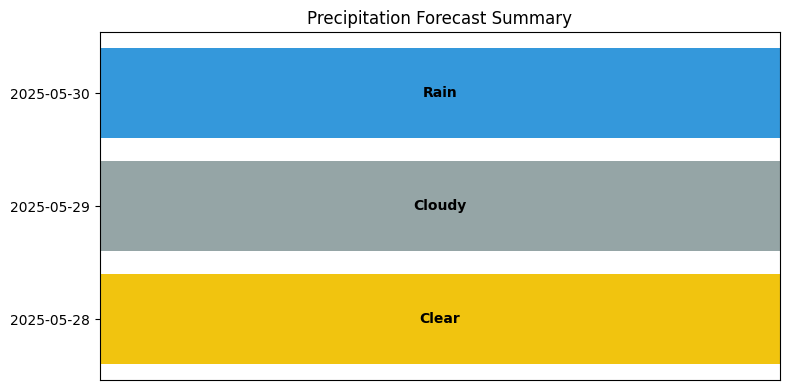

In [29]:
# ✅ Use this consistently throughout your notebook
weather_data = get_weather_data("Perth", 3)

# Visualize precipitation-style summary
create_precipitation_summary_chart(weather_data)


## 🤖 Natural Language Processing

In [17]:
# Define parse_weather_question()
import re
from datetime import datetime

def parse_weather_question(question):
    """
    Parse a user's natural language weather question into structured components.

    Args:
        question (str): The user's weather question.

    Returns:
        dict: Parsed components including city, days, attribute, or an error message.
    """
    question = question.lower()

    # Step 1: Detect attribute
    attributes = ["rain", "snow", "cloud", "sun", "clear", "temperature", "hot", "cold"]
    found_attr = next((attr for attr in attributes if attr in question), "general")

    # Step 2: Determine number of forecast days
    days = 1  # default
    weekdays = ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"]

    if "today" in question:
        days = 1
    elif "tomorrow" in question:
        days = 2
    elif "week" in question:
        days = 3
    else:
        for i, day in enumerate(weekdays):
            if day in question:
                today_idx = datetime.today().weekday()
                target_idx = i
                delta_days = (target_idx - today_idx) % 7
                days = delta_days + 1
                break

    # Step 3: Check forecast range limit
    if days > 3:
        return {
            "status": "error",
            "error": "❌ Sorry, only 3-day forecasts are available. Please choose today, tomorrow, or this week."
        }

    # Step 4: Extract city name
    city_match = re.search(r"in ([a-zA-Z\s]+)", question)
    if city_match:
        city = city_match.group(1).strip()
        # Remove weekday or time keywords from city string
        for keyword in ["today", "tomorrow", "this week", "this weekend"] + weekdays:
            city = city.replace(keyword, "").strip()
        city = re.sub(r"\s+", " ", city).strip()  # Normalize spaces
    else:
        return {
            "status": "error",
            "error": "⚠️ Please include a location in your weather question (e.g. 'in Brisbane')."
        }

    # Return structured data
    return {
        "status": "ok",
        "city": city.title(),
        "attribute": found_attr,
        "days": days
    }



In [18]:
user_question = "Will it rain in Perth this Wednesday?"
parsed = parse_weather_question(user_question)
print(parsed)


{'status': 'ok', 'city': 'In Perth This', 'attribute': 'rain', 'days': 1}


In [19]:
# Format_weather_response() here
def format_weather_response(parsed_question, weather_data):
    from IPython.display import HTML

    if not weather_data or "forecast" not in weather_data:
        return "⚠️ Sorry, I couldn't retrieve valid weather data."

    city = parsed_question["city"]
    attr = parsed_question["attribute"]
    days = parsed_question["days"]
    forecast = weather_data["forecast"]
    current = weather_data.get("current_condition", {})

    # ✅ Ensure this is declared early
    response = []

    # Header
    response.append(f"<h3>📍 Weather for {city}</h3>")

    # Current Conditions
    if current and current.get("temp_C") and current.get("condition"):
        response.append(f"<p>🌡️ <b>Current Temperature:</b> {current['temp_C']}°C</p>")
        response.append(f"<p>⛅ <b>Condition:</b> {current['condition'].capitalize()}</p>")
    else:
        response.append("<p>🔎 Current conditions are unavailable.</p>")

    # Forecast
    if attr in ["rain", "snow", "cloud", "clear", "sun"]:
        for day in forecast[:days]:
            condition = day.get("condition", "").lower()
            emoji = (
                "🌧️" if "rain" in condition else
                "❄️" if "snow" in condition else
                "☁️" if "cloud" in condition else
                "☀️" if "sun" in condition or "clear" in condition else
                "🔍"
            )
            match = attr in condition
            response.append(f"📅 {day['date']}: {condition} – {emoji} {'Yes ✅' if match else 'No ❌'}")
    else:
        # Temperature / general forecast
        response.append("<h4>📅 Temperature Forecast:</h4><ul>")
        for day in forecast[:days]:
            condition = day.get("condition", "").lower()
            msg = ""
            if "rain" in condition:
                msg = "🌧️ Rain expected – take an umbrella!"
            elif "sun" in condition or "clear" in condition:
                msg = "☀️ Clear skies – enjoy the sunshine!"
            elif "cloud" in condition:
                msg = "☁️ Cloudy skies"
            elif "snow" in condition:
                msg = "❄️ Snow forecasted – bundle up!"

            response.append(
                f"<li>{day['date']}: {day['min_temp_C']}°C – {day['max_temp_C']}°C, {condition} – {msg}</li>"
            )
        response.append("</ul>")

    return "<br>".join(response)


In [22]:
from IPython.display import display, HTML

user_question = "Will it rain in Perth this Wednesday?"
parsed = parse_weather_question(user_question)

if parsed.get("status") == "error":
    print(parsed["error"])
else:
    weather_data = get_weather_data(parsed["city"], parsed["days"])
    display(HTML(format_weather_response(parsed, weather_data)))



📍 Weather for In Perth This
🌡️ Current Temperature: 17°C
⛅ Condition: Partly cloudy

📅 Temperature Forecast:
  • 2025-05-28: 10°C – 19°C, patchy rain nearby 🌧️ – Rain expected


## 🧩 Main Application Logic

In [31]:
# Tie everything together here
def run_weather_advisor(user_question):
    """
    Main function to handle the full weather advisor logic.

    Args:
        user_question (str): The user's natural language weather question.

    Returns:
        str: Natural language response or error message.
    """
    if not user_question.strip():
        return "⚠️ Please enter a weather question."

    parsed = parse_weather_question(user_question)
    if parsed.get("status") == "error":
        return parsed["error"]

    try:
        weather_data = get_weather_data(parsed["city"], parsed["days"])
        if not weather_data:
            return "❌ Could not retrieve weather data."
        return format_weather_response(parsed, weather_data)
    except Exception as e:
        return f"❌ An unexpected error occurred: {e}"


## 🧭 User Interface

In [30]:
# Menu functions defined with ipywidgets

import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

# --- INPUT WIDGETS ---
question_input = widgets.Text(
    value='',
    placeholder='Type your weather question here...',
    description='Ask here!:',
    layout=widgets.Layout(width='100%')
)

question_examples = widgets.Dropdown(
    options=[
        '',
        "Will it rain in Perth tomorrow?",
        "What's the weather in Sydney today?",
        "Is it sunny in Melbourne this weekend?",
        "Will it snow in Hobart this Friday?"
    ],
    description='Need inspo?',
    layout=widgets.Layout(width='100%')
)

run_button = widgets.Button(description="Ask Weather 🌤", button_style='success')
reset_button = widgets.Button(description="Reset 🔄", button_style='warning')
output = widgets.Output()

# --- LOGIC HANDLER ---
def handle_weather_query(user_question):
    if not user_question.strip():
        return HTML("<b style='color:orange;'>⚠️ Please enter a weather question.</b>")

    response = run_weather_advisor(user_question)
    return HTML(f"<pre>{response}</pre>")

# --- BUTTON BEHAVIOR ---
def on_button_click(b):
    with output:
        clear_output()
        result = handle_weather_query(question_input.value)
        display(result)

def on_reset_click(b):
    question_input.value = ''
    question_examples.value = ''
    with output:
        clear_output()

def on_dropdown_change(change):
    if change['type'] == 'change' and change['name'] == 'value' and change['new']:
        question_input.value = change['new']

# --- EVENT LISTENERS ---
run_button.on_click(on_button_click)
reset_button.on_click(on_reset_click)
question_examples.observe(on_dropdown_change)

# --- DISPLAY LAYOUT ---
ui = widgets.VBox([
    question_examples,
    question_input,
    widgets.HBox([run_button, reset_button]),
    output
])

display(ui)


## 🧪 Testing and Examples

In [32]:
# Include sample input/output for each function

# parsing logic and generating
user_question = "Will it rain in Perth this Wednesday?"
parsed = parse_weather_question(user_question)
print(parsed)

test_cases = [
    "Will it rain in Perth tomorrow?",
    "What's the weather in Sydney today?",
    "Is it sunny in Melbourne this weekend?",
    "Weather in India tomorrow?",
    "",
    "Hi"
]

for question in test_cases:
    print(f"\n❓ Question: {question}")
    display(run_weather_advisor(question))

# Note: wttr.in returns plausible weather data even for non-existent cities like 'Atlantis'.
# This may lead to false positives unless additional validation is added.

{'status': 'ok', 'city': 'In Perth This', 'attribute': 'rain', 'days': 1}

❓ Question: Will it rain in Perth tomorrow?

📍 Weather for In Perth
🌡️ Current Temperature: 16°C
⛅ Condition: Overcast

📅 Temperature Forecast:
  • 2025-05-28: 12°C – 25°C, None
  • 2025-05-29: 12°C – 24°C, None


'<h3>📍 Weather for In Perth</h3><br><p>🔎 Current conditions are unavailable.</p><br>📅 2025-05-28: overcast  – 🔍 No ❌<br>📅 2025-05-29: overcast  – 🔍 No ❌'


❓ Question: What's the weather in Sydney today?

📍 Weather for Sydney
🌡️ Current Temperature: 15°C
⛅ Condition: Clear

📅 Temperature Forecast:
  • 2025-05-28: 11°C – 18°C, sunny ☀️ – Clear weather


'<h3>📍 Weather for Sydney</h3><br><p>🔎 Current conditions are unavailable.</p><br><h4>📅 Temperature Forecast:</h4><ul><br><li>2025-05-28: 11°C – 18°C, sunny – ☀️ Clear skies – enjoy the sunshine!</li><br></ul>'


❓ Question: Is it sunny in Melbourne this weekend?

📍 Weather for Melbourne End
🌡️ Current Temperature: 25°C
⛅ Condition: Mist

📅 Temperature Forecast:
  • 2025-05-28: 29°C – 31°C, patchy rain nearby 🌧️ – Rain expected
  • 2025-05-29: 30°C – 31°C, patchy rain nearby 🌧️ – Rain expected
  • 2025-05-30: 29°C – 32°C, patchy rain nearby 🌧️ – Rain expected


'<h3>📍 Weather for Melbourne End</h3><br><p>🔎 Current conditions are unavailable.</p><br>📅 2025-05-28: patchy rain nearby – 🌧️ No ❌<br>📅 2025-05-29: patchy rain nearby – 🌧️ No ❌<br>📅 2025-05-30: patchy rain nearby – 🌧️ No ❌'


❓ Question: Weather in India tomorrow?

📍 Weather for India
🌡️ Current Temperature: 36°C
⛅ Condition: Partly cloudy

📅 Temperature Forecast:
  • 2025-05-28: 26°C – 37°C, None
  • 2025-05-29: 27°C – 39°C, sunny ☀️ – Clear weather


'<h3>📍 Weather for India</h3><br><p>🔎 Current conditions are unavailable.</p><br><h4>📅 Temperature Forecast:</h4><ul><br><li>2025-05-28: 26°C – 37°C, overcast  – </li><br><li>2025-05-29: 27°C – 39°C, sunny – ☀️ Clear skies – enjoy the sunshine!</li><br></ul>'


❓ Question: 


'⚠️ Please enter a weather question.'


❓ Question: Hi


"⚠️ Please include a location in your weather question (e.g. 'in Brisbane')."

## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.